beta: 0.00033
0.0


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16416\240632475.py:94: MatplotlibDeprecationWarning: Passing the loc parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  fig.legend((l1, l2, l3, l4), ('S', 'I', 'R', 'V'), 'center right')


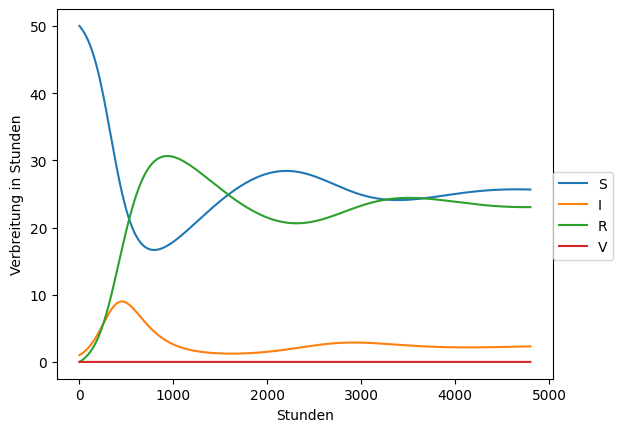

In [58]:
"""
AUTHOREN: HANAN WANDJI DANGA §§ ARIOL TATEPO FABRICE
"""

"""
Ausgangspunkt dieses Projekts ist die Simulation der Ausbreitung von Infektionskrankheiten mit einem mathematischen Modell, 
das wir in [LL20] finden.
wir haben folgende Ausgangspunkte zu Bearbeiten:

 => Abschnitt 8.3 „Spreading of Disease“ ab Seite 225.
 => Die Aufgaben 8.7 „Model an Adaptive Vaccination Campaign“ und 8.8 „Make a SIRV Model with Time-Limited Effect of 
Vaccination“, die Sie ab Seite 274 im Buch finden.

Zielgruppe unserer Projektarbeit sind Studierende im Studiengang Angewandte Informatik im Vertiefungsstudium mit oder keine
Kenntnisse mit der Programmiersprache Python.
In der ersten Jupyter Notebook haben wir uns mit dem Abschnitt 8.3 „Spreading of Disease“ ab Seite 225 beschäftigt. In diesem 
Abschnitt konzentrieren wir uns auf die zwei verbleibenden Abschnitten und Zwar : 

Die Aufgaben 8.7 „Model an Adaptive Vaccination Campaign“ und 8.8 „Make a SIRV Model with Time-Limited Effect of 
Vaccination“, die Sie ab Seite 274 im Buch finden.
"""
"""
Erklärung des Abschnitts 8.7: Modell einer adaptiven Impfkampagne

In dem SIRV-Modell mit zeitabhängiger Impfung aus Abschnitt 8.3.9 wollen wir die Wirkung einer adaptiven Impfkampagne testen, 
bei der die Impfung so lange angeboten wird, wie die Hälfte der Bevölkerung nicht geimpft ist. Die Kampagne beginnt nach Δ Tagen. 
Das heißt, p = p0, wenn V < 1/2 (S[0] + I[0]) und t>Δ Tage, sonst p = 0.
Dabei demonstrieren wir die Wirkung dieser Impfpolitik, wählen β, γ und ν wie in Abschnitt 8.3.9, setzen  p = 0,001, Δ = 10 Tage, 
und wir simulieren  200 Tage lang.
Noch dazu  implementieren wir die diskontinuierliche p(t)-Funktion als Python-Funktion, die den angegebenen if-Test enthält. 
"""
"""
In diesem Unterkapitel werden wir versuchen, verschiedene Simulationen durchzufuhren, um den Einfluss und die Auswirkungen von
Werte von β, γ und ν auf die Ausbreitung des Virus in Abhängigkeit vom Wert von p zu untersuchen. Dazu haben  wir die Funktion
die den Wert von p in Abhängigkeit von den in der Übung erwähnten Bedingungen zurückgibt, implementiert.
"""

import numpy as np
import matplotlib.pyplot as plt

# Time unit: 1 h
beta = 10./(40*8*24)
beta = beta=0.00033 
print('beta:', beta)
gamma = 3./(15*24)
dt = 0.1             # 6 min  <=> 60 min =1
D = 200              # Simulation für D Tagen
N_t = int(D*24/dt)   # Entsprechende Anzahl von Zeitschritten
nu = 1./(24*50)      # Durchschnittlicher Verlust der Immunität: 50 Tage

p=0.001
Δ = 10  # 10 Tagen für Delta      

t = np.linspace(0, N_t*dt, N_t+1)
S = np.zeros(N_t+1)
I = np.zeros(N_t+1)
R = np.zeros(N_t+1)
V = np.zeros(N_t+1)

# Anfangsbedingungen
S[0] = 50
I[0] = 1
R[0] = 0
V[0] = 0


    
#p(t) Implementierung der Funktion für die Berechnung von P gemäß die Bedingungen
def pBerechnung(float: t, int: S, I, V, Δ ):
    if ((V <((S/2) + (I/2))) & (t > Δ )).all():
        p=p[0]
        return p
    else:
        return 0.0
    
p = pBerechnung(t, S[0],I[0],V,Δ ) # Ermittlung von p in Abhängigkeiten von der Funktion
print(p)

# Schrittgleichungen in der Zeit vorwärts
for n in range(N_t):
    
        S[n+1] = S[n] - dt*beta*S[n]*I[n] + dt*nu*R[n] - dt*p*S[n]
        V[n+1] = V[n] + dt*p*S[n]
        I[n+1] = I[n] + dt*beta*S[n]*I[n] - dt*gamma*I[n]
        R[n+1] = R[n] + dt*gamma*I[n] - dt*nu*R[n]
        loss = int(V[n+1] + S[n+1] + R[n+1] + I[n+1]) - \
           int(V[0] + S[0] + R[0] + I[0])

fig = plt.figure()
l1, l2, l3, l4 = plt.plot(t, S, t, I, t, R, t, V)
fig.legend((l1, l2, l3, l4), ('S', 'I', 'R', 'V'), 'center right')
plt.ylabel('Verbreitung in Stunden')
plt.xlabel('Stunden')
plt.show()

beta: 0.00033
0.0


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16416\2674802904.py:83: MatplotlibDeprecationWarning: Passing the loc parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  fig.legend((l1, l2, l3, l4), ('S', 'I', 'R', 'V'), 'center right')


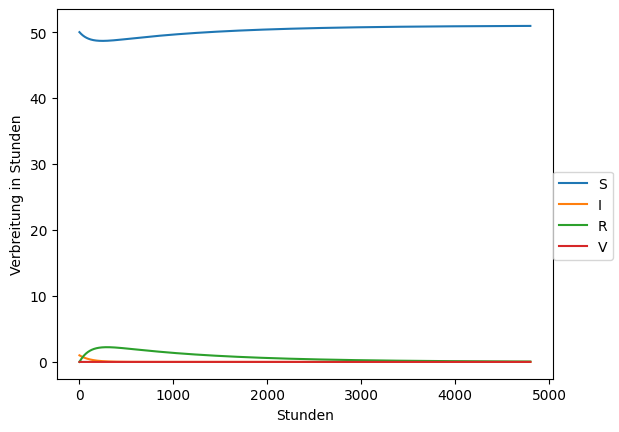

In [59]:
"""
=======================================INTERPRETATION DES ERSTEN GRAPHENS=====================================================
Unsere erste Simulation liefert ein wirklich beeindruckendes Ergebnis. Wir sehen ein erstaunliches Verhalten der Kurven im Vergleich zu den anderen.
Die Kurven von S(Zufällige) und R(gesund) schwanken und treffen sich mehr als dreimal.
Das ist wirklich bemerkenswert im Vergleich zu den vorherigen Malen. Erstens ist bemerkenswert, dass  keine Impfung gebraucht wird. 
während des gesamten Zeitraums von 200 Tagen und die Kurve von V(geimpft) verhält sich wie eine Gerade mit der Gleichung y(x)=0. 
Bei t=0 treffen die Kurven von R(gesund) und I(Infiziert) aufeinander und danach steigt die R-Kurve an, bis sie bei t= 500 
Stunden auf die S(Zufällige)-Kurve trifft mit S=R=20. 
Wir haben 20/50= 0.4 prozent von Heilung und 20/50=0.4 Prozent von (Zufällige) nach 500/24=20.83 tagen. Die Kurve von R steigt dann an und erreicht sein
Maximum bei R=30.
Das bedeutet, dass maximal 30/50= 60 Prozent der Menschen geheilt werden können. Sie wird dann abfallen
und trifft bei t=1500 Stunden und von t=3200 bis t=3500 Stunden noch zweimal auf S(Zufällige), wo sie sich wie folgt verhalten
beide als Geraden mit der Gleichung y(x)=22. Danach steigt sie noch einmal leicht an, bevor sie sich stabilisiert, 
indem sie der folgenden Linie folgt der Geraden mit der Gleichung y(x)=25.
Die Kurve von S(Zufällige) schwankt ebenfalls und erreicht bei t=700 Stunden mit S=18 ihren Minimalwert.
Das bedeutet, dass 18/50 =36% der Bevölkerung weiterhin für eine Ansteckung mit dem Virus empfänglich sind.
Die Kurve von I(Infiziert) erreicht ihren Höhepunkt bei t=200 Stunden mit I=8, was bedeutet, dass
(50-8)=40/50= 80 Prozent der Bevölkerung werden sich nie mit dem Virus infizieren, was bereits sehr beachtlich ist. 
In der Folge nimmt sie ab, bis sie den Wert 3 erreicht, bevor sie sich gemäß der Gleichungsgeraden y(x)=3 und manchmal
y(x)=2 verhält




"""
"""
In dieser Simulation Werden wir die Werte von Beta, gamma, oder nu, um den Einfluss und die Auswirkungen von
Werte von β, γ und ν auf die Ausbreitung des Virus in Abhängigkeit vom Wert von p zu untersuchen. Dazu haben  wir die Funktion
die den Wert von p in Abhängigkeit von den in der Übung erwähnten Bedingungen zurückgibt, implementiert.
Hierbei werden wir den Wert von Gamma ändern, um seinen Einfluss auf das Verhältnis der Kurven zu bestimmen. Dabei wird gamma
drei mal multipliziert. D.h der neue Wert von Gamma Lautet dann: neue gamma= 3* alte gamma
"""
import numpy as np
import matplotlib.pyplot as plt

# Time unit: 1 h
beta = 10./(40*8*24)
beta = beta=0.00033  
print('beta:', beta)
gamma = 3*3./(15*24)
dt = 0.1             # 6 min  <=> 60 min =1
D = 200              # Simulation für D Tagen
N_t = int(D*24/dt)   # Entsprechende Anzahl von Zeitschritten
nu = 1./(24*50)      # Durchschnittlicher Verlust der Immunität: 50 Tage

p=0.001
Δ = 10  # 10 Tagen für Delta      

t = np.linspace(0, N_t*dt, N_t+1)
S = np.zeros(N_t+1)
I = np.zeros(N_t+1)
R = np.zeros(N_t+1)
V = np.zeros(N_t+1)

# Anfangsbedingungen
S[0] = 50
I[0] = 1
R[0] = 0
V[0] = 0


    
#p(t) Implementierung der Funktion für die Berechnung von P gemäß die Bedingungen
def pBerechnung(float: t, int: S, I, V, Δ ):
    if ((V <((S/2) + (I/2))) & (t > Δ )).all():
        p=p[0]
        return p
    else:
        return 0.0
    
p = pBerechnung(t, S[0],I[0],V,Δ ) # Ermittlung von p in Abhängigkeiten von der Funktion
print(p)

# Schrittgleichungen in der Zeit vorwärts
for n in range(N_t):
    
        S[n+1] = S[n] - dt*beta*S[n]*I[n] + dt*nu*R[n] - dt*p*S[n]
        V[n+1] = V[n] + dt*p*S[n]
        I[n+1] = I[n] + dt*beta*S[n]*I[n] - dt*gamma*I[n]
        R[n+1] = R[n] + dt*gamma*I[n] - dt*nu*R[n]
        loss = int(V[n+1] + S[n+1] + R[n+1] + I[n+1]) - \
           int(V[0] + S[0] + R[0] + I[0])

fig = plt.figure()
l1, l2, l3, l4 = plt.plot(t, S, t, I, t, R, t, V)
fig.legend((l1, l2, l3, l4), ('S', 'I', 'R', 'V'), 'center right')
plt.ylabel('Verbreitung in Stunden')
plt.xlabel('Stunden')
plt.show()


beta: 0.00165
0.0


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16416\256703174.py:77: MatplotlibDeprecationWarning: Passing the loc parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  fig.legend((l1, l2, l3, l4), ('S', 'I', 'R', 'V'), 'center right')


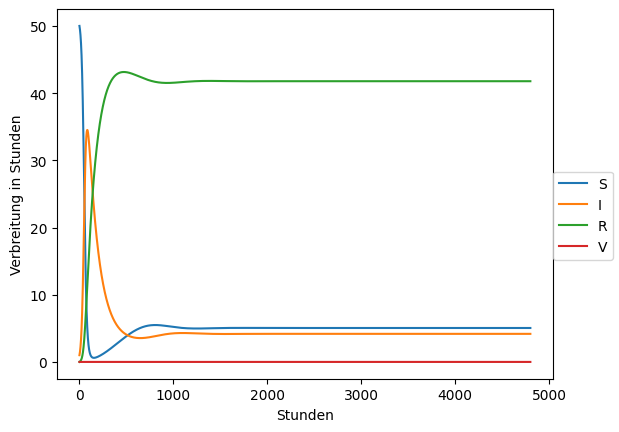

In [60]:
"""
=======================================INTERPRETATION DES ZWEITEN GRAPHENS=====================================================
Mit einem neuen Gamma, das nun das Dreifache seines vorherigen Wertes beträgt, haben wir eine sehr bemerkenswerte Veränderung der Kurven. 
Alle unsere Kurven verhalten sich nun wie Geraden. Das Verhalten der V(Geimpft)-Kurve unterscheidet sich nicht von dem der
Sie folgt während der 200 Tage immer der Geraden mit der Gleichung y(x)=0. Die Infektionskurve I(Infiziert) ist null und ist
während der gesamten Simulationsperiode von 200 Tagen ebenfalls null. Die Kurve von R(Gesund) erreicht ihr Maximum bei 1, bevor sie
sie wiederum abnimmt und der Geraden mit der Gleichung y(x)=0 folgt. Das bedeutet, dass die zu Beginn infizierte Person
die Heilung erreicht und es keine prozentuale Chance mehr gibt, dass eine weitere Person infiziert wird.
Die S-Kurve stagniert nach der Gleichung y(x)=50. Innerhalb von 200 Tagen gibt es also keine Ansteckung, nur eine einzige Krankheit.
Es gibt nur eine einzige Heilung, nämlich die der ursprünglich erkrankten Person. Dies ist die beste Simulation, 
die wir je hatten, denn wir haben einen Gammawert=3*3./(15*24), der uns ein Ansteckungsrisiko = und eine 100%ige Heilung verspricht.
Die anfänglich empfänglichen Personen sind leider immer noch in Gefahr, auch wenn der Wert während unserer gesamten Simulation stagniert.

"""

"""
In dieser Simulation Werden wir die Werte von Beta, gamma, oder nu, um den Einfluss ihre Auswirkungen 
auf die Ausbreitung des Virus in Abhängigkeit vom Wert von p zu untersuchen. Dazu haben  wir die Funktion
die den Wert von p in Abhängigkeit von den in der Übung erwähnten Bedingungen zurückgibt, implementiert.
Hierbei werden wir den Wert von Beta ändern, um seinen Einfluss auf das Verhältnis der Kurven zu bestimmen. Dabei wird Beta
fünf mal multipliziert. D.h der neue Wert von   Lautet dann: neue Beta = 5* alte Beta
"""
import numpy as np
import matplotlib.pyplot as plt

# Time unit: 1 h
beta = 10./(40*8*24)
beta = beta=0.00033 
beta= 5*beta
print('beta:', beta)
gamma = 3./(15*24)
dt = 0.1             # 6 min  <=> 60 min =1
D = 200              # Simulation für D Tagen
N_t = int(D*24/dt)   # Entsprechende Anzahl von Zeitschritten
nu = 1./(24*50)      # Durchschnittlicher Verlust der Immunität: 50 Tage

p=0.001
Δ = 10  # 10 Tagen für Delta      

t = np.linspace(0, N_t*dt, N_t+1)
S = np.zeros(N_t+1)
I = np.zeros(N_t+1)
R = np.zeros(N_t+1)
V = np.zeros(N_t+1)

# Anfangsbedingungen
S[0] = 50
I[0] = 1
R[0] = 0
V[0] = 0


    
#p(t) Implementierung der Funktion für die Berechnung von P gemäß die Bedingungen
def pBerechnung(float: t, int: S, I, V, Δ ):
    if ((V <((S/2) + (I/2))) & (t > Δ )).all():
        p=p[0]
        return p
    else:
        return 0.0
    
p = pBerechnung(t, S[0],I[0],V,Δ ) # Ermittlung von p in Abhängigkeiten von der Funktion
print(p)

# Schrittgleichungen in der Zeit vorwärts
for n in range(N_t):
    
        S[n+1] = S[n] - dt*beta*S[n]*I[n] + dt*nu*R[n] - dt*p*S[n]
        V[n+1] = V[n] + dt*p*S[n]
        I[n+1] = I[n] + dt*beta*S[n]*I[n] - dt*gamma*I[n]
        R[n+1] = R[n] + dt*gamma*I[n] - dt*nu*R[n]
        loss = int(V[n+1] + S[n+1] + R[n+1] + I[n+1]) - \
           int(V[0] + S[0] + R[0] + I[0])

fig = plt.figure()
l1, l2, l3, l4 = plt.plot(t, S, t, I, t, R, t, V)
fig.legend((l1, l2, l3, l4), ('S', 'I', 'R', 'V'), 'center right')
plt.ylabel('Verbreitung in Stunden')
plt.xlabel('Stunden')
plt.show()



beta: 0.00033
0.0


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16416\3274975205.py:80: MatplotlibDeprecationWarning: Passing the loc parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  fig.legend((l1, l2, l3, l4), ('S', 'I', 'R', 'V'), 'center right')


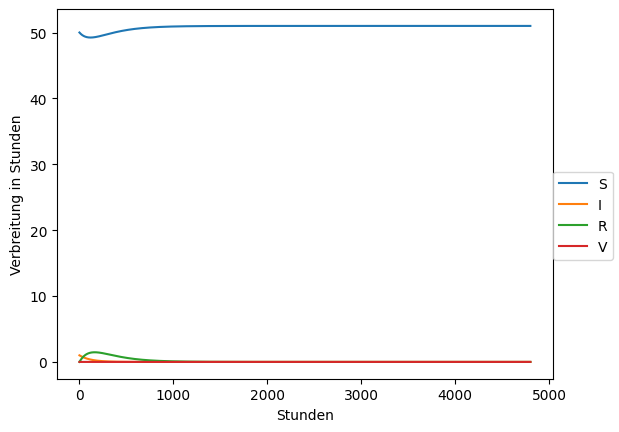

In [66]:
"""
=======================================INTERPRETATION DES DRITTEN GRAPHENS=====================================================
die Änderung von Beta um das Fünffache seines Anfangswertes ergibt ein neues Verhalten der Kurven, das sich völlig 
von den Simulationen der vorherigen Kurven unterscheidet

Die Kurve von S (Zufällige) und die Kurve von R (gesund) verhalten sich entgegengesetzt. Während die S-Kurve auf den Wert von 
S=1. Das bedeutet, dass 49/50 oder 1/50=0,01% noch wahrnehmbar sind, und das direkt nach 50 Stunden= 2 Tage 2 Stunden.
Unmittelbar nach t=0, trifft die S-Kurve auf die I-Kurve von S=32 bis S=1. und verhält sich in seiner 
in der Endphase unmittelbar nach t=600 Stunden wie eine Gerade mit der Gleichung y(x)=6. Es ist auch wichtig zu erwähnen, dass zwischen
50<t<600 ein leichter Anstieg zu verzeichnen ist.
Die Kurve der Infektionen steigt stark an, bis sie den Wert 32 erreicht. Das bedeutet 32/50= 64 Prozent von Infektionen.
Das sind fast 60 Prozent mehr Infektionen als in der vorherigen Simulation. Dann trifft sie auf die Kurve
R(gesund) mit R=I=25 bei t=100 Stunden. Das bedeutet, dass nach fast 4 Tagen 25/50= 50 Prozent bereits infiziert sind.
Danach trifft sie bei t=600 auf die S-Kurve, bevor sie auf der Geraden mit der Gleichung y(x)=5 stagniert.
Die Kurve R (gesund) ist, wie bereits erwähnt, der Kurve von S entgegengesetzt und steigt an, bis sie ihren Höchstwert erreicht.
Das bedeutet, dass der Prozentsatz von 42/50=84 Prozent an Heilungen der bisher beste ist. Auf ihrem Weg trifft sie auf
die Kurve von S(Zufällige) bei t=50 Stunden und die Kurve von I(Infiziert) bei t=200.

"""
"""
In dieser Simulation Werden wir die Werte von Beta, gamma, oder nu, um den Einfluss und ihre Auswirkungen 
 auf die Ausbreitung des Virus in Abhängigkeit vom Wert von p zu untersuchen. Dazu haben  wir die Funktion
die den Wert von p in Abhängigkeit von den in der Übung erwähnten Bedingungen zurückgibt, implementiert.
Hierbei werden wir den Wert von nu und gamma ändern, um ihre Einflüsse auf das Verhältnis der Kurven zu bestimmen. Dabei wird nu
fünf mal multipliziert und gamma drei mal. D.h der neue Wert von   Lautet dann: neue nu = 5* alte nu und neue gamma= 3* alte
gamma
"""

import numpy as np
import matplotlib.pyplot as plt

# Time unit: 1 h
beta = 10./(40*8*24)
beta = beta=0.00033  
print('beta:', beta)
gamma = 3*3/(15*24)
dt = 0.1             # 6 min  <=> 60 min =1
D = 200              # Simulation für D Tagen
N_t = int(D*24/dt)   # Entsprechende Anzahl von Zeitschritten
nu = 5*1./(24*50)      # Durchschnittlicher Verlust der Immunität: 50 Tage

p=0.001
Δ = 10  # 10 Tagen für Delta      

t = np.linspace(0, N_t*dt, N_t+1)
S = np.zeros(N_t+1)
I = np.zeros(N_t+1)
R = np.zeros(N_t+1)
V = np.zeros(N_t+1)

# Anfangsbedingungen
S[0] = 50
I[0] = 1
R[0] = 0
V[0] = 0


    
#p(t) Implementierung der Funktion für die Berechnung von P gemäß die Bedingungen
def pBerechnung(float: t, int: S, I, V, Δ ):
    if ((V <((S/2) + (I/2))) & (t > Δ )).all():
        p=p[0]
        return p
    else:
        return 0.0
    
p = pBerechnung(t, S[0],I[0],V,Δ ) # Ermittlung von p in Abhängigkeiten von der Funktion
print(p)

# Schrittgleichungen in der Zeit vorwärts
for n in range(N_t):
    
        S[n+1] = S[n] - dt*beta*S[n]*I[n] + dt*nu*R[n] - dt*p*S[n]
        V[n+1] = V[n] + dt*p*S[n]
        I[n+1] = I[n] + dt*beta*S[n]*I[n] - dt*gamma*I[n]
        R[n+1] = R[n] + dt*gamma*I[n] - dt*nu*R[n]
        loss = int(V[n+1] + S[n+1] + R[n+1] + I[n+1]) - \
           int(V[0] + S[0] + R[0] + I[0])

fig = plt.figure()
l1, l2, l3, l4 = plt.plot(t, S, t, I, t, R, t, V)
fig.legend((l1, l2, l3, l4), ('S', 'I', 'R', 'V'), 'center right')
plt.ylabel('Verbreitung in Stunden')
plt.xlabel('Stunden')
plt.show()

beta: 8.25e-05
0.0


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16416\1337048608.py:80: MatplotlibDeprecationWarning: Passing the loc parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  fig.legend((l1, l2, l3, l4), ('S', 'I', 'R', 'V'), 'center right')


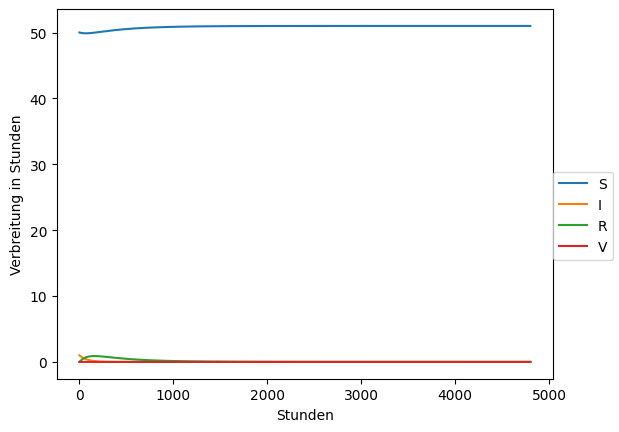

In [67]:
"""
=======================================INTERPRETATION DES VIERTEN GRAPHENS=====================================================
Mit einem neuen Nu, der nun fünfmal größer ist als sein vorheriger Wert, haben wir eine sehr bemerkenswerte Veränderung der Kurven. 
Alle unsere Kurven verhalten sich nun wie Geraden. Das Verhalten der Kurve V(geimpft) unterscheidet sich nicht wie früher.
Während der 200 Tage folgt sie immer die Gerade mit der Gleichung y(x)=0. Die Infektionskurve I(Infiziert) ist null.
und während des gesamten Simulationszeitraums von 200 Tagen ebenfalls null. Die Kurve von R(Gesund) erreicht ihren Höchststand 1,dann
fällt sie wieder ab und folgt die Gerade mit der Gleichung y(x)=0. Das bedeutet, dass die zu Beginn infizierte Person
die Heilung erreicht und es prozentual keine Chance mehr gibt, dass eine weitere Person infiziert wird.
Die S-Kurve stagniert gemäß der Gleichung y(x)=50. Innerhalb von 200 Tagen gibt es also keine Ansteckung, nur eine einzige Krankheit.
Es gibt nur eine einzige Heilung, nämlich die der ursprünglich erkrankten Person. Dies ist die beste Simulation, die wir je hatten, denn wir haben 
einen Gammawert=3*3./(15*24) haben, mit dem wir jede Ansteckungsgefahr ausschließen = und der uns eine 100%ige Heilung verspricht.
Leider sind die ursprünglich empfänglichen Personen immer noch gefährdet, auch wenn der Wert während unserer gesamten Simulation stagniert.
Dies ist das gleiche Verhalten wie in unserer zweiten Simulation, in der wir den Gammawert um das Dreifache erhöht haben.  
Der einzige Unterschied ist, dass die Heilung der infizierten Person bei t=500 Stunden wesentlich schneller erfolgt, 
im Gegensatz zu t=2500 Stunden bei der zweiten Simulation.
Im Vergleich dazu blieb die Person viel kränker, nämlich bis t=2500 Stunden, bevor sie geheilt wurde.
Wir haben also eine Entwicklung von 2500/500= 5 mal schnellerer Heilung.
Die Erhöhung von Gamma und Nu ermöglicht es uns, unsere besten Ergebnisse zu erzielen, aber es ist wichtig zu beachten, dass
Nu  5/3 effektiver als Gamma ist, wenn es um die Beschleunigung des Prozesses geht.
"""
"""
In dieser Simulation Werden wir die Werte von Beta, gamma, oder nu, um den Einfluss und ihre Auswirkungen auf die
Ausbreitung des Virus in Abhängigkeit vom Wert von p zu untersuchen. Dazu haben  wir die Funktion
die den Wert von p in Abhängigkeit von den in der Übung erwähnten Bedingungen zurückgibt, implementiert.
Hierbei werden wir den Wert von nu, gamma und Beta gleichzeitig zufälligerweise ändern, und beobachten, was daraus kommt.
"""
import numpy as np
import matplotlib.pyplot as plt

# Time unit: 1 h
beta = 10./(40*8*24)
beta = beta=0.00033
beta =0.25 *beta
print('beta:', beta)
gamma = 2*3./(15*24)
dt = 0.1             # 6 min  <=> 60 min =1
D = 200              # Simulation für D Tagen
N_t = int(D*24/dt)   # Entsprechende Anzahl von Zeitschritten
nu = 3*1./(24*50)      # Durchschnittlicher Verlust der Immunität: 50 Tage

p=0.001
Δ = 10  # 10 Tagen für Delta      

t = np.linspace(0, N_t*dt, N_t+1)
S = np.zeros(N_t+1)
I = np.zeros(N_t+1)
R = np.zeros(N_t+1)
V = np.zeros(N_t+1)

# Anfangsbedingungen
S[0] = 50
I[0] = 1
R[0] = 0
V[0] = 0


    
#p(t) Implementierung der Funktion für die Berechnung von P gemäß die Bedingungen
def pBerechnung(float: t, int: S, I, V, Δ ):
    if ((V <((S/2) + (I/2))) & (t > Δ )).all():
        p=p[0]
        return p
    else:
        return 0.0
    
p = pBerechnung(t, S[0],I[0],V,Δ ) # Ermittlung von p in Abhängigkeiten von der Funktion
print(p)

# Schrittgleichungen in der Zeit vorwärts
for n in range(N_t):
    
        S[n+1] = S[n] - dt*beta*S[n]*I[n] + dt*nu*R[n] - dt*p*S[n]
        V[n+1] = V[n] + dt*p*S[n]
        I[n+1] = I[n] + dt*beta*S[n]*I[n] - dt*gamma*I[n]
        R[n+1] = R[n] + dt*gamma*I[n] - dt*nu*R[n]
        loss = int(V[n+1] + S[n+1] + R[n+1] + I[n+1]) - \
           int(V[0] + S[0] + R[0] + I[0])

fig = plt.figure()
l1, l2, l3, l4 = plt.plot(t, S, t, I, t, R, t, V)
fig.legend((l1, l2, l3, l4), ('S', 'I', 'R', 'V'), 'center right')
plt.ylabel('Verbreitung in Stunden')
plt.xlabel('Stunden')
plt.show()



In [68]:
"""
=======================================INTERPRETATION DES FÜNFTEN GRAPHENS=====================================================
Die gleichzeitige Änderung der Werte für Beta, Gamma und Nu ändert nicht viel am Verhalten der Kurven.
Sie sind alle linear entlang der Gleichungsgeraden:
V(x)=0 für die Kurve von V
R(x)=0 für die Kurve von R
I(x)=0 für die Kurve von I
S(x)=50 für die Kurve von S.

Sie beschleunigt lediglich den Heilungsprozess der infizierten Person, hat aber keinen Einfluss auf die Entwicklung des Virus.


"""

'\n=======================================INTERPRETATION DES XXX GRAPHENS=====================================================\n\n\n\n'

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24088\1268221050.py:72: MatplotlibDeprecationWarning: Passing the loc parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  fig.legend((l1, l2, l3, l4), ('S', 'I', 'R', 'V'), 'center right')


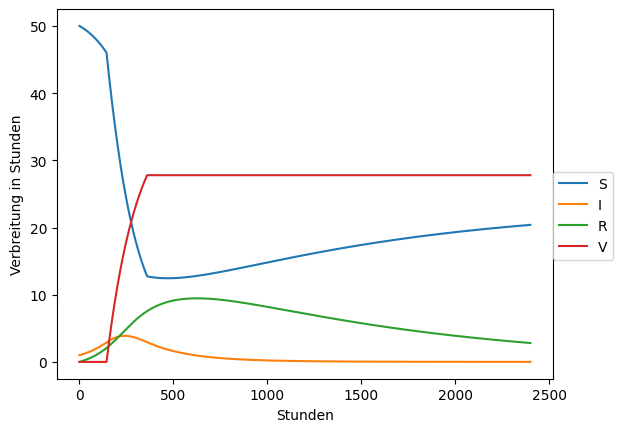

In [10]:
"""
Wir betrachten das SIRV-Modell aus Abschnitt 8.3.8, aber jetzt ist die Wirkung der Impfung zeitlich begrenzt ist. 
Nach einer charakteristischen Zeitspanne von π ist die Impfung nicht mehr und die Individuen werden folglich von der
Kategorie V in die Kategorie S verschoben und können wieder infiziert werden. Mathematisch lässt sich dies als ein 
durchschnittlicher Leckverlust modellieren.
-π-1^V aus der Kategorie V in die Kategorie S modelliert werden (d. h. ein Gewinn π-1^V in letzterer).
Schreiben Sie das vollständige Modell, implementieren Sie es und wiederholen Sie den Fall aus Abschnitt 8.3.8 mit
verschiedenen Parametern durch, um verschiedene Effekte zu veranschaulichen.


In unserer Erster Simulation haben wir Folgende Parameter Werte:

beta= 10./(40*8*24) beta= beta/4, D= 100, S(0)= 50 und I(0)= 1,R[0] = 0,V[0] = 0 und γ = 3/(15 · 24),
dt= 0.1, N_t = int(D*24/dt), nu=  1./(24*50).
Die Impfkampagne hat folgende Parameterwerte:
p = np.zeros(N_t+1)
start_index = int(6*24/dt)  # 6 Tagen = 6*24 h, geteilt durch dt=0.1 ergibt Intervalle
stop_index = int(15*24/dt)
p[start_index:stop_index] = 0.005


Wendet man diese Parameter auf einen neuen Fall, in dem es anfangs einen Infizierten und 50 Anfällige gibt, 
ergeben sich die Diagramme in die untere Abbildung. Diese Graphen Kurven zwischen den Werten 
zu den Zeitpunkten ti = iΔt, wie sie vom Programm berechnet wurden. Diese Simulation führen wir erstmal 
für 100 Tagen.


"""

import numpy as np
import matplotlib.pyplot as plt

# Time unit: 1 h
beta = 10./(40*8*24)
beta /= 4            #  beta reduziert 
gamma = 3./(15*24)
dt = 0.1             # 6 min  <=> 60 min =1
D = 100              # Simulation für D Tagen
N_t = int(D*24/dt)   # Entsprechende Anzahl von Zeitschritten
nu = 1./(24*50)      # Durchschnittlicher Verlust der Immunität: 50 Tage

t = np.linspace(0, N_t*dt, N_t+1)
S = np.zeros(N_t+1)
I = np.zeros(N_t+1)
R = np.zeros(N_t+1)
V = np.zeros(N_t+1)

# Impfaktion
p = np.zeros(N_t+1)
start_index = int(6*24/dt)  # 6 Tagen = 6*24 h, geteilt durch dt=0.1 ergibt Intervalle
stop_index = int(15*24/dt)
p[start_index:stop_index] = 0.005

# Anfangsbedingungen
S[0] = 50
I[0] = 1
R[0] = 0
V[0] = 0

# Schrittgleichungen in der Zeit vorwärts
for n in range(N_t):
    S[n+1] = S[n] - dt*beta*S[n]*I[n] + dt*nu*R[n] - dt*p[n]*S[n]
    V[n+1] = V[n] + dt*p[n]*S[n]
    I[n+1] = I[n] + dt*beta*S[n]*I[n] - dt*gamma*I[n]
    R[n+1] = R[n] + dt*gamma*I[n] - dt*nu*R[n]
    loss = int(V[n+1] + S[n+1] + R[n+1] + I[n+1]) - \
           int(V[0] + S[0] + R[0] + I[0])
    

fig = plt.figure()
l1, l2, l3, l4 = plt.plot(t, S, t, I, t, R, t, V)
fig.legend((l1, l2, l3, l4), ('S', 'I', 'R', 'V'), 'center right')
plt.ylabel('Verbreitung in Stunden')
plt.xlabel('Stunden')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24088\3562796474.py:71: MatplotlibDeprecationWarning: Passing the loc parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  fig.legend((l1, l2, l3, l4), ('S', 'I', 'R', 'V'), 'center right')


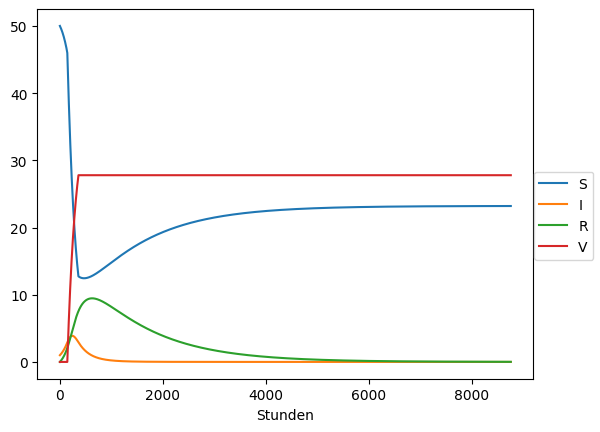

In [5]:
"""
=======================================INTERPRETATION DES SECHSTEN GRAPHENS=====================================================

Bei t= 0 ist die Kurve von V(geimpft) konstant und zwar für 100 Stunden Zeit(4,16 Tage) und trifft sich auch mit der Kurve 
von R (gesund). Nach 100 Stunden trifft sie sich mit der Kurve I (Infizierte) und R mit S=3 und t =100 Stunden. Das bedeutet, 
dass -π-1^V bzw π-1^V Auswirkungen auf die Impfung hat. Nach nur 4,16 Tagen fangen die geimpften Personen das Virus wieder ein. 
Danach steigt die V-Kurve weiter bis zu einem Niveau von V=20 und trifft bei t=300 Stunden auf die S-Kurve (wahrscheinlich 
Infizierte) mit S=20. Auf diesem Niveau haben wir die gleiche Anzahl von geimpften Personen wie wahrscheinlich infizierte 
Personen mit einem Prozentsatz von 20/50 =0,4. Die V-Kurve erreicht ihren Höhepunkt bei einem Wert von V=27 und t=400 Stunden, 
was bedeutet, dass es aufgrund von  -π-1^V bzw π-1^V immer noch 23/50=0,46 Personen  existieren , die nie geimpft werden.

Die I-Kurve (Infizierte) steigt nur bis zum Wert S=3 und trifft sich mit der V-Kurve (Geimpfte), R-Kurve (Krieger) bei t=100 Stunden
(4,16 Tage) und erreicht dort ihren Höhepunkt, bevor sie wieder absinkt und nach 500 Stunden (20,83 Tage) gegen 0 geht. P -π-1^V bzw π-1^V
hat keinen großen Einfluss auf die Infektion, da sie nach 20,83 Tagen wie zuvor immer gegen null tendiert.

Die S-Kurve (wahrscheinlich infizierte Personen) fällt ab, bevor sie bei S=20 auf die V-Kurve trifft und bis zu einem bestimmten
Wert von S=12 und t= 410 Stunden abfällt, bevor sie wieder zu wachsen beginnt. Man kann also auch schlussfolgern, dass es einen 
Prozentsatz an Menschen gibt, die aufgrund von Pi nie geimpft werden.


"""

"""
In dieser Simulation wollen wir erstmal herausfinden, was passieren wird , wenn wir eine gleiche Simulation wie vorher durchführen
aber mit D(anzahl von Tagen= 365= ein Jahr). Vielleicht werden sich die Kurven von R und V überschneiden, oder die Kurve von S
wird z.B herunterfallen, sodass alle Personen die Impfung kriegen können.
"""
import numpy as np
import matplotlib.pyplot as plt

# Time unit: 1 h
beta = 10./(40*8*24)
beta /= 4            #  beta reduziert 
gamma = 3./(15*24)
dt = 0.1             # 6 min  <=> 60 min =1
D = 365              # Simulation für D Tagen
N_t = int(D*24/dt)   # Entsprechende Anzahl von Zeitschritten
nu = 1./(24*50)      # Durchschnittlicher Verlust der Immunität: 50 Tage

t = np.linspace(0, N_t*dt, N_t+1)
S = np.zeros(N_t+1)
I = np.zeros(N_t+1)
R = np.zeros(N_t+1)
V = np.zeros(N_t+1)

# Impfaktion
p = np.zeros(N_t+1)
start_index = int(6*24/dt)  # 6 Tagen = 6*24 h, geteilt durch dt=0.1 ergibt Intervalle
stop_index = int(15*24/dt)
p[start_index:stop_index] = 0.005

# Anfangsbedingungen
S[0] = 50
I[0] = 1
R[0] = 0
V[0] = 0

# Schrittgleichungen in der Zeit vorwärts
for n in range(N_t):
    S[n+1] = S[n] - dt*beta*S[n]*I[n] + dt*nu*R[n] - dt*p[n]*S[n]
    V[n+1] = V[n] + dt*p[n]*S[n]
    I[n+1] = I[n] + dt*beta*S[n]*I[n] - dt*gamma*I[n]
    R[n+1] = R[n] + dt*gamma*I[n] - dt*nu*R[n]
    loss = int(V[n+1] + S[n+1] + R[n+1] + I[n+1]) - \
           int(V[0] + S[0] + R[0] + I[0])
    if loss > 0:
        print('loss: {:d}'.format(loss))

fig = plt.figure()
l1, l2, l3, l4 = plt.plot(t, S, t, I, t, R, t, V)
fig.legend((l1, l2, l3, l4), ('S', 'I', 'R', 'V'), 'center right')
plt.ylabel('Verbreitung in Stunden')
plt.xlabel('Stunden')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24088\3581842148.py:63: MatplotlibDeprecationWarning: Passing the loc parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  fig.legend((l1, l2, l3, l4), ('S', 'I', 'R', 'V'), 'center right')


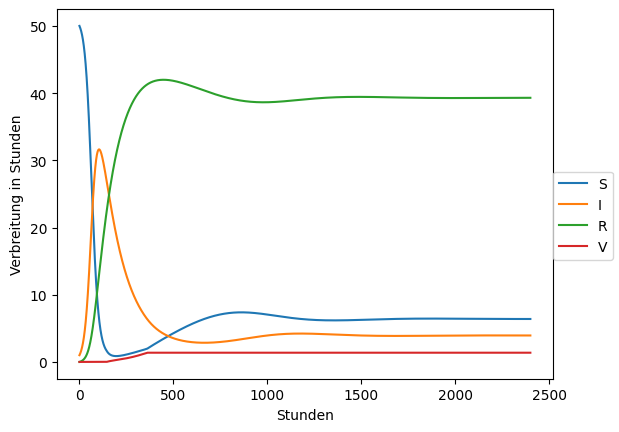

In [11]:
"""
=======================================INTERPRETATION DES SIEBTEN GRAPHENS=====================================================
Die Kurven treffen sich zum gleichen Zeitpunkt wie in der vorherigen Simulation.
Der größte Unterschied besteht darin, dass die Kurve von I(infiziert) auf die Kurve von R(gesund) nach 5200 Stunden= 216,66 Tagen 
trifft.Die geimpften Personen können bzw müssen also erneut geimpft werden. 
Das würde zum Beispiel bedeuten, dass der Impfstoff eine Gültigkeitsdauer von 217 Tagen hat.
und dass die Menschen nach dieser Zeit von geimpft V zu wahrscheinlich infiziert S wechseln.
Dennoch stagnieren die Kurven von V und S auf dem Niveau von V=27 bzw. S=20, was bedeutet, dass es immer noch einen Prozentsatz an Personen gibt,
die sich nicht anstecken lassen und Personen gibt, die den Impfstoff nie erhalten werden.

Wir müssen uns also die folgende Frage stellen: 
 Ist die Anzahl der Impfungen unzureichend oder inwiefern verhindert der Faktor Pi die Impfung von bestimmten Personen? 

"""
"""
In unserer nächsten Simulation wollen wir den Einfluss der Beta- und Gamma-Parameter auf die Impfung überprüfen.
Vielleicht könnten wir mit einem größeren oder kleineren Beta- bzw Gammawert die Impfung unserer gesamten Bevölkerung erreichen. 
 Deshalb werden wir zunächst den Wert von beta um das Vierfache seines vorherigen Wertes erhöhen.
(neue beta= 4* alte beta) und versuchen, zu sehen, was dabei herauskommt.
"""
import numpy as np
import matplotlib.pyplot as plt

# Time unit: 1 h
beta = 10./(40*8*24)# beta 4 mal erhöht
gamma = 3./(15*24)
dt = 0.1             # 6 min  <=> 60 min =1
D = 100             # Simulation für D Tagen
N_t = int(D*24/dt)   # Entsprechende Anzahl von Zeitschritten
nu = 1./(24*50)      # Durchschnittlicher Verlust der Immunität: 50 Tage

t = np.linspace(0, N_t*dt, N_t+1)
S = np.zeros(N_t+1)
I = np.zeros(N_t+1)
R = np.zeros(N_t+1)
V = np.zeros(N_t+1)

# Impfaktion
p = np.zeros(N_t+1)
start_index = int(6*24/dt)  # 6 Tagen = 6*24 h, geteilt durch dt=0.1 ergibt Intervalle
stop_index = int(15*24/dt)
p[start_index:stop_index] = 0.005

# Anfangsbedingungen
S[0] = 50
I[0] = 1
R[0] = 0
V[0] = 0

# Schrittgleichungen in der Zeit vorwärts
for n in range(N_t):
    S[n+1] = S[n] - dt*beta*S[n]*I[n] + dt*nu*R[n] - dt*p[n]*S[n]
    V[n+1] = V[n] + dt*p[n]*S[n]
    I[n+1] = I[n] + dt*beta*S[n]*I[n] - dt*gamma*I[n]
    R[n+1] = R[n] + dt*gamma*I[n] - dt*nu*R[n]
    loss = int(V[n+1] + S[n+1] + R[n+1] + I[n+1]) - \
           int(V[0] + S[0] + R[0] + I[0])
    if loss > 0:
        print('loss: {:d}'.format(loss))

fig = plt.figure()
l1, l2, l3, l4 = plt.plot(t, S, t, I, t, R, t, V)
fig.legend((l1, l2, l3, l4), ('S', 'I', 'R', 'V'), 'center right')
plt.ylabel('Verbreitung in Stunden')
plt.xlabel('Stunden')
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24088\449943215.py:70: MatplotlibDeprecationWarning: Passing the loc parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  fig.legend((l1, l2, l3, l4), ('S', 'I', 'R', 'V'), 'center right')


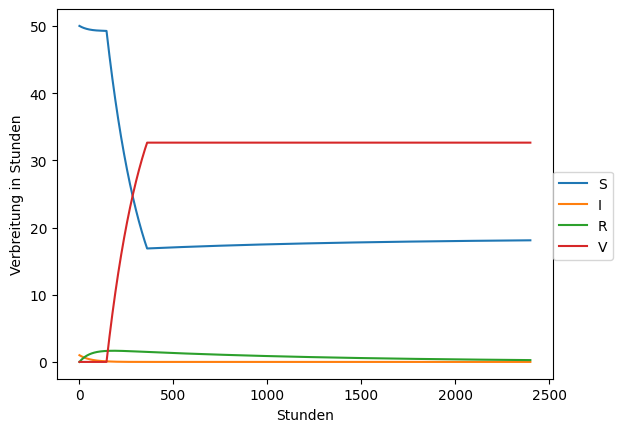

In [12]:
"""
=======================================INTERPRETATION DES ACHTEN GRAPHENS=====================================================
Mit einem Betawert, der viermal so hoch ist wie der vorherige Wert, hat sich das Verhalten zwischen den Kurven wirklich verändert.
Die V(geimpft)-Kurve ist die ganze Zeit über fast null. Sie erreicht ihren Höhepunkt bei V=1 und t=400 Stunden und stagniert dann.
bis über 2000 Stunden.
Die Kurve von I(Infizierte) steigt im Vergleich zu den vorherigen Simulationen erheblich an und erreicht ihren Spitzenwert bei t=100 Stunden.
und I= 31= 0,62 prozent = 10-mal mehr als zuvor. Sie trifft zweimal mit der Kurve von S(Zufällige) zusammen:
Bei t=50 Stunden und I=20 während des Anstiegs und bei t=450 Stunden und I=3 während des Abstiegs, bevor sie bei diesem Wert stagniert.
Die S(Zufällige)-Kurve steigt stark an und nähert sich fast der V(geimpft)-Kurve zwischen
100<t<400 Stunden. Das bedeutet, dass wir mit einem Anstieg von Beta auf das Vierfache seines Wertes beinahe die Impfung der gesamten
Bevölkerung erreicht hätten . Danach beginnt die S-Kurve wieder zu wachsen und stagniert, 
indem sie sich wie eine Gerade verhält und die folgendermaßen  Funktion v(x)=5 verläuft.
Die R(gesund)-Kurve trifft bei t=100 und R=8, sie trifft bei t= 250 Stunden=10,41 Tage auf die S-Kurve. wieder auf die S-Kurve.

mit der I-Kurve mit einem Wert von R=I= 25. Das bedeutet, dass nach 10 Tagen die Anzahl der geheilten Personen gleich der Anzahl der infizierten Personen ist. 
Es wird nie eine Heilung der gesamten Bevölkerung geben. Es kommt zu 50% Heilung und 50% Wahrscheinlichkeit von Neuinfektionen

"""

"""
In unserer nächsten Simulation wollen wir den Einfluss der Beta- und Gamma-Parameter auf die Impfung überprüfen.
Vielleicht könnten wir mit einem größeren oder kleineren Beta- bzw Gammawert die Impfung unserer gesamten Bevölkerung erreichen. 
 Deshalb werden wir dieses Mal den Wert von gamma um das Vierfache seines vorherigen Wertes erhöhen.
(neue gamma= 4* alte gamma) und versuchen, zu sehen, was dabei herauskommt.
"""
import numpy as np
import matplotlib.pyplot as plt

# Time unit: 1 h
beta = 10./(40*8*24)
beta /=4 # beta normal
gamma = 3*4./(15*24)# gamma 4 mal erhöht
dt = 0.1             # 6 min  <=> 60 min =1
D = 100             # Simulation für D Tagen
N_t = int(D*24/dt)   # Entsprechende Anzahl von Zeitschritten
nu = 1./(24*50)      # Durchschnittlicher Verlust der Immunität: 50 Tage

t = np.linspace(0, N_t*dt, N_t+1)
S = np.zeros(N_t+1)
I = np.zeros(N_t+1)
R = np.zeros(N_t+1)
V = np.zeros(N_t+1)

# Impfaktion
p = np.zeros(N_t+1)
start_index = int(6*24/dt)  # 6 Tagen = 6*24 h, geteilt durch dt=0.1 ergibt Intervalle
stop_index = int(15*24/dt)
p[start_index:stop_index] = 0.005

# Anfangsbedingungen
S[0] = 50
I[0] = 1
R[0] = 0
V[0] = 0

# Schrittgleichungen in der Zeit vorwärts
for n in range(N_t):
    S[n+1] = S[n] - dt*beta*S[n]*I[n] + dt*nu*R[n] - dt*p[n]*S[n]
    V[n+1] = V[n] + dt*p[n]*S[n]
    I[n+1] = I[n] + dt*beta*S[n]*I[n] - dt*gamma*I[n]
    R[n+1] = R[n] + dt*gamma*I[n] - dt*nu*R[n]
    loss = int(V[n+1] + S[n+1] + R[n+1] + I[n+1]) - \
           int(V[0] + S[0] + R[0] + I[0])
    if loss > 0:
        print('loss: {:d}'.format(loss))

fig = plt.figure()
l1, l2, l3, l4 = plt.plot(t, S, t, I, t, R, t, V)
fig.legend((l1, l2, l3, l4), ('S', 'I', 'R', 'V'), 'center right')
plt.ylabel('Verbreitung in Stunden')
plt.xlabel('Stunden')
plt.show()



C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24088\3112085908.py:76: MatplotlibDeprecationWarning: Passing the loc parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  fig.legend((l1, l2, l3, l4), ('S', 'I', 'R', 'V'), 'center right')


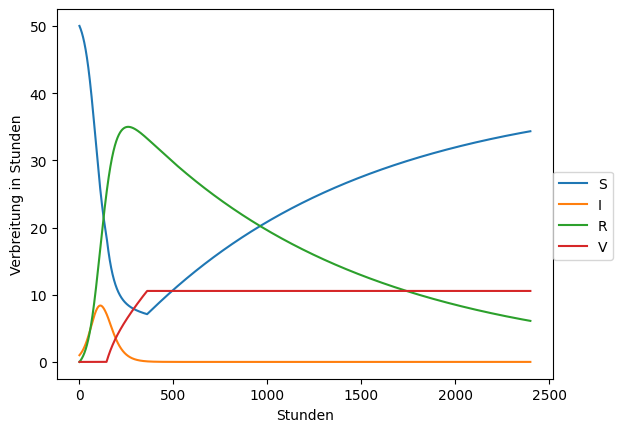

In [13]:
"""
=======================================INTERPRETATION DES NEUNTEN GRAPHENS====================================================
Die Erhöhung von gamma um das vierfache seines vorherigen wertes hat ebenfalls einen erheblichen einfluss auf das verhalten 
der kurven.

Die Kurve der Infizierten I verhält sich wie eine Gerade mit der Gleichung I(x)=0. Das bedeutet, dass die Wahrscheinlichkeit 
von Infektionen fast gleich Null ist.Die Erhöhung von Gamma verringert also die Wahrscheinlichkeit von Infektionen der Krankheit
, während die Erhöhung von Beta das Risiko von Infektionen erhöht.
Die Kurve R (gesund) stagniert ebenfalls und folgt der gleichen Gleichung wie die der Infektionen, die lautet:
R(x)=0. Die Erhöhung von Gamma hat also keinen Einfluss die Heilung der infizierten Personen.

Die S-Kurve fällt stark ab und trifft bei t=250 Stunden und V=25 auf die V-Kurve (Geimpfte).Das heißt, wir haben wieder 50% 
geimpfte Personen und 50% Personen, die noch infiziert werden können. Danach stagniert sie bei S=18 und verhält sich wie eine 
Gerade mit der Gleichung S(x)=18. Sie trifft nie auf die Kurve von I(Infizierte).
Das bedeutet, dass die Infektionsrate bei S fast auf Null ist, aber Personen aus S immer noch anfällig sind.
Zusammenfassend lässt sich sagen, dass wir eine Infektionsrate von fast null haben, aber die Anzahl der Personen, die 
wahrscheinlich infiziert werden, ist ebenso groß. Die Infektionsrate ist hoch.

Die V-Kurve der Impfung steigt an und trifft bei t=250 Stunden und S=25 auf die S-Kurve und stagniert schließlich ihrerseits.
bei V=31 und folgt der Gleichung v(x)=31.

Zusammenfassend lässt sich sagen, dass die Erhöhung von Gamma das Risiko von Infektionen erheblich verringert, aber wir haben 
immer noch einen großen Teil der Bevölkerung 18/50=36 Prozent, die  weiterhin anfällig für Infektionen sind.


"""
"""
In unserer nächsten Simulation wollen wir den Einfluss der Beta- und Gamma-Parameter auf die Impfung überprüfen.
Vielleicht könnten wir mit einem größeren oder kleineren Beta- bzw Gammawert die Impfung unserer gesamten Bevölkerung erreichen. 
Deshalb werden wir dieses Mal den Wert von gamma und Beta gleichzeitig  um das Vierfache seines vorherigen Wertes erhöhen.
(neue gamma= 4* alte gamma, neue beta= 4* alte beta) und versuchen, zu sehen, was dabei herauskommt.
"""
# beta und gamma 4 mal Erhöht 
import numpy as np
import matplotlib.pyplot as plt

# Time unit: 1 h
beta = 10./(40*8*24)# beta auch 4 mal Erhöht 
gamma = 3*4./(15*24)# gamma 4 mal erhöht
dt = 0.1             # 6 min  <=> 60 min =1
D = 100             # Simulation für D Tagen
N_t = int(D*24/dt)   # Entsprechende Anzahl von Zeitschritten
nu = 1./(24*50)      # Durchschnittlicher Verlust der Immunität: 50 Tage

t = np.linspace(0, N_t*dt, N_t+1)
S = np.zeros(N_t+1)
I = np.zeros(N_t+1)
R = np.zeros(N_t+1)
V = np.zeros(N_t+1)

# Impfaktion
p = np.zeros(N_t+1)
start_index = int(6*24/dt)  # 6 Tagen = 6*24 h, geteilt durch dt=0.1 ergibt Intervalle
stop_index = int(15*24/dt)
p[start_index:stop_index] = 0.005

# Anfangsbedingungen
S[0] = 50
I[0] = 1
R[0] = 0
V[0] = 0

# Schrittgleichungen in der Zeit vorwärts
for n in range(N_t):
    S[n+1] = S[n] - dt*beta*S[n]*I[n] + dt*nu*R[n] - dt*p[n]*S[n]
    V[n+1] = V[n] + dt*p[n]*S[n]
    I[n+1] = I[n] + dt*beta*S[n]*I[n] - dt*gamma*I[n]
    R[n+1] = R[n] + dt*gamma*I[n] - dt*nu*R[n]
    loss = int(V[n+1] + S[n+1] + R[n+1] + I[n+1]) - \
           int(V[0] + S[0] + R[0] + I[0])
    

fig = plt.figure()
l1, l2, l3, l4 = plt.plot(t, S, t, I, t, R, t, V)
fig.legend((l1, l2, l3, l4), ('S', 'I', 'R', 'V'), 'center right')
plt.ylabel('Verbreitung in Stunden')
plt.xlabel('Stunden')
plt.show()



In [ ]:
"""
=======================================INTERPRETATION DES ZEHNTEN GRAPHENS====================================================
Die gleichzeitige Änderung der Beta- und Gammawerte scheint sich auszuzahlen. Denn wenn man das Verhalten der Kurven beobachtet
kann man direkt erkennen, dass sich die Kurve von S (Zufällige) und die Kurve von V (geimpfte Personen) überschneiden.

Die Kurve der geimpften Personen V verhält sich wie eine Gerade mit der Gleichung v(x)=0, wenn 0<t<100 Stunden und steigt dann an. 
bis V=10, wenn 100<t<300 Stunden und verhält sich dann wieder wie eine Gerade mit der Gleichung v(x)=10 bis über
bis zu 2500 Stunden. Wichtig ist auch, dass sie bei t=80 Std. auf die Kurve des Infizierten I trifft, mit V=5.
Die Kurve der Infizierten I steigt bis zu einem bestimmten Wert von I=8 an und kreuzt die Kurve der Empfänglichen S  und die 
der geimpften Personen V. Nach mehr als 150 Stunden verhält sie sich wieder wie eine Gerade mit der Gleichung i(x)=0
Die Kurve der Empfänglichen nimmt stark ab und trifft erneut auf die Kurve der Krieger R mit S=R=25.
Im Gegensatz zu den vorherigen Fällen stagniert sie diesmal nicht, sondern fällt weiter ab, bis sie auf die Kurve der V trifft. 
V, die bei t=300 Stunden und S=8 geimpft wurden. Das bedeutet, dass nur noch 8/50 = 16% der Bevölkerung empfänglich sind.
im Vergleich zu den vorherigen Fällen. Dies bedeutet eine Verbesserung der Empfindlichkeit um 20 Prozent. Diese Verbesserung
ist jedoch nur von kurzer Dauer. 
Sie hält nur etwa 50 Stunden (zwei Tage) an, danach steigt sie weiterhin exponentiell an.
Die Erhöhung von Beta und Gamma verringert die Empfindlichkeit, aber nur für kurze Zeit.

Die Kurve von R(gesund) steigt an und trifft bei t=100 auf die Kurve von S(empfindlich) und erreicht bei t=30 ihren Höhepunkt. 
R=33. Danach nimmt sie ab und trifft bei 900 Uhr auf die Kurve von S mit S=R=21. Danach nimmt sie wieder ab und trifft auf 
die Kurve von  V(geimpft) mit R=10 und sinkt exponentiell gegen 0.

Die Veränderung der Beta- und Gammawerte scheint einen Einfluss auf den Verlauf der Infektion und der Impfung zu haben.
Dies gilt jedoch nur für einen Zeitraum von t, der langfristig nicht ausreicht.


"""

"""
======================================================FAZIT===================================================================
Nach unseren verschiedenen Simulationen, bei denen wir drei verschidene Arbeitsbereiche hatten, insbesondere:
8.3, 8.7 und 8.8: Die Ausbreitung des Virus, genauer gesagt der Krankheit, hängt von mehreren Parametern ab.
Zu Beginn simulierten wir nur die Ausbreitung des Virus in Abhängigkeit von den Werten der Kurse S(Zufällige), I(Infiziert) und
R(gesund). In diesen Simulationen haben wir das unterschiedliche Verhalten der Kurven je nach den Werten von Beta,
Gamma und Nu bemerkt. Anschließend integrierten wir eine neue Kurve V(Impfung), die das Verhalten ebenfalls drastisch veränderte.

===================================================ÜBERRASCHENDE ERGEBNISSE===================================================
Unsere bemerkenswerten Ergebnisse traten in Kapitel 8.7 auf:
In unseren verschiedenen Simulationen haben wir festgestellt, dass bei einer Erhöhung des Gamma-Wertes auf das Dreifache des vorherigen Wertes,
eine deutliche Verbesserung, genauer gesagt fast optimale Ergebnisse, erzielten.
Die Impfung war gleich null, da die empfänglichen S-Personen während der gesamten Simulation nicht an der Krankheit erkrankten.
Darüber hinaus schreitet die Infektion nicht fort und die einzige Person, die zu Beginn infiziert ist, wird wieder gesund.
Das zweite bemerkenswerte Ergebnis tratt ein, als wir die Werte von gamma und Nu gleichzeitig ändern. 
Das Infektionsrisiko ist immer noch null, aber die Heilungsgeschwindigkeit der infizierten Person ist viel schneller.
Das dritte beeindruckende Ergebnis tratt ein, wenn wir die Werte von Beta, Gamma und Nu gleichzeitig geändert haben.
Zu diesem Zeitpunkt wurde die infizierte Person fast sofort geheilt.
Daraus können wir schließen, dass diese drei Parameter einen erheblichen Einfluss auf die Entwicklung und Ausbreitung der Krankheit haben.
und dass ihre gleichzeitige Veränderung den Verlauf der Krankheit entweder verschlechtert oder verbessert.


"""